In [56]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,confusion_matrix
from genetic_selection import GeneticSelectionCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 

### Loading the data

In [57]:
df = pd.read_csv('creditcard.csv')
print(f"No. of rows int the dataset: {df.shape[0]}")
print(f"no. of columns in the dataset:{df.shape[1]}")

No. of rows int the dataset: 284807
no. of columns in the dataset:31


In [58]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [59]:
print("the name of columns in dataset are: ")
df.columns

the name of columns in dataset are: 


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### droping the time column

In [60]:
df.drop(["Time"],axis=1,inplace=True) #there is no use of time column

In [61]:
df.dtypes

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [62]:
# deleting all the null values and count the number of null values
df.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

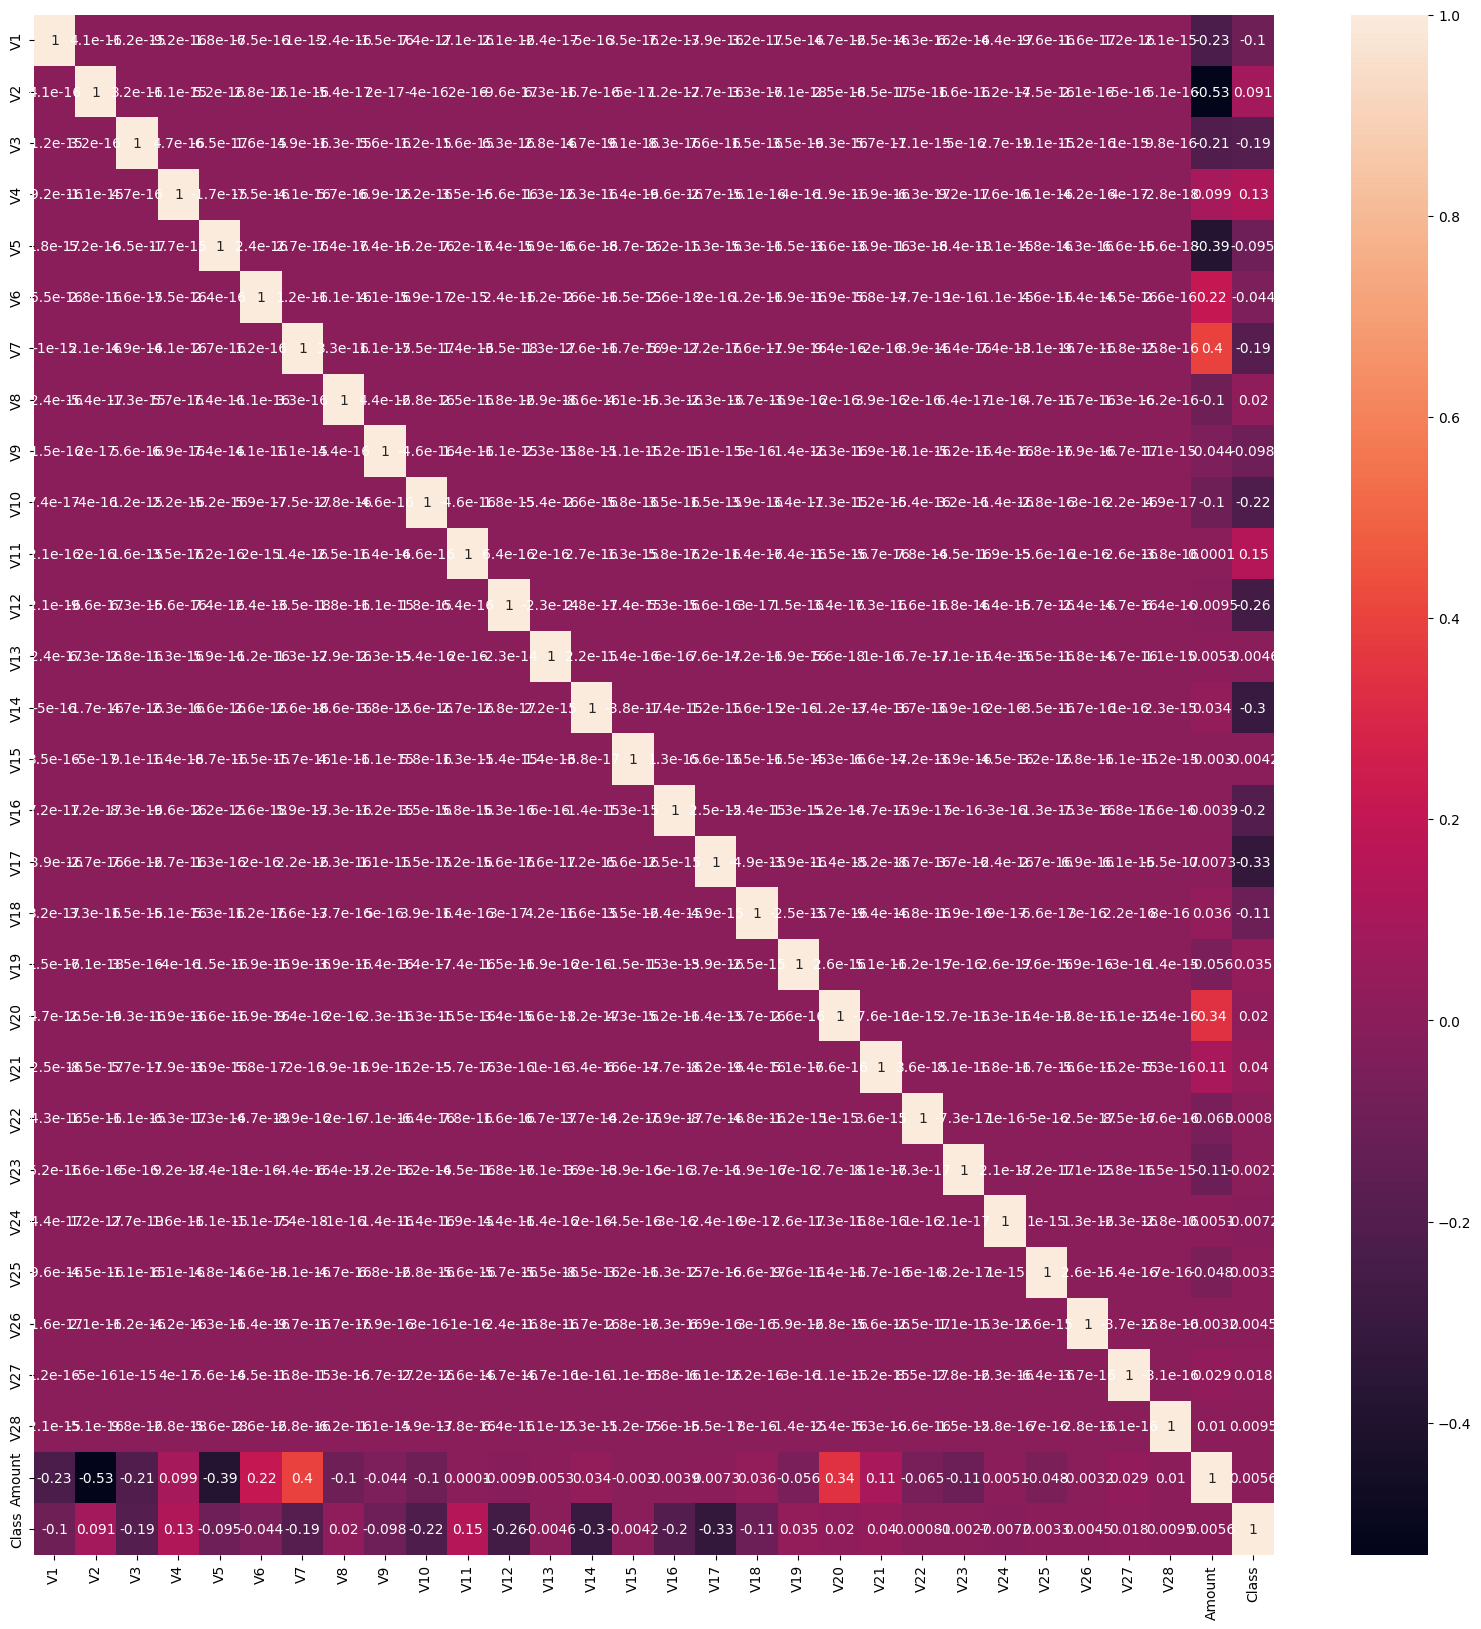

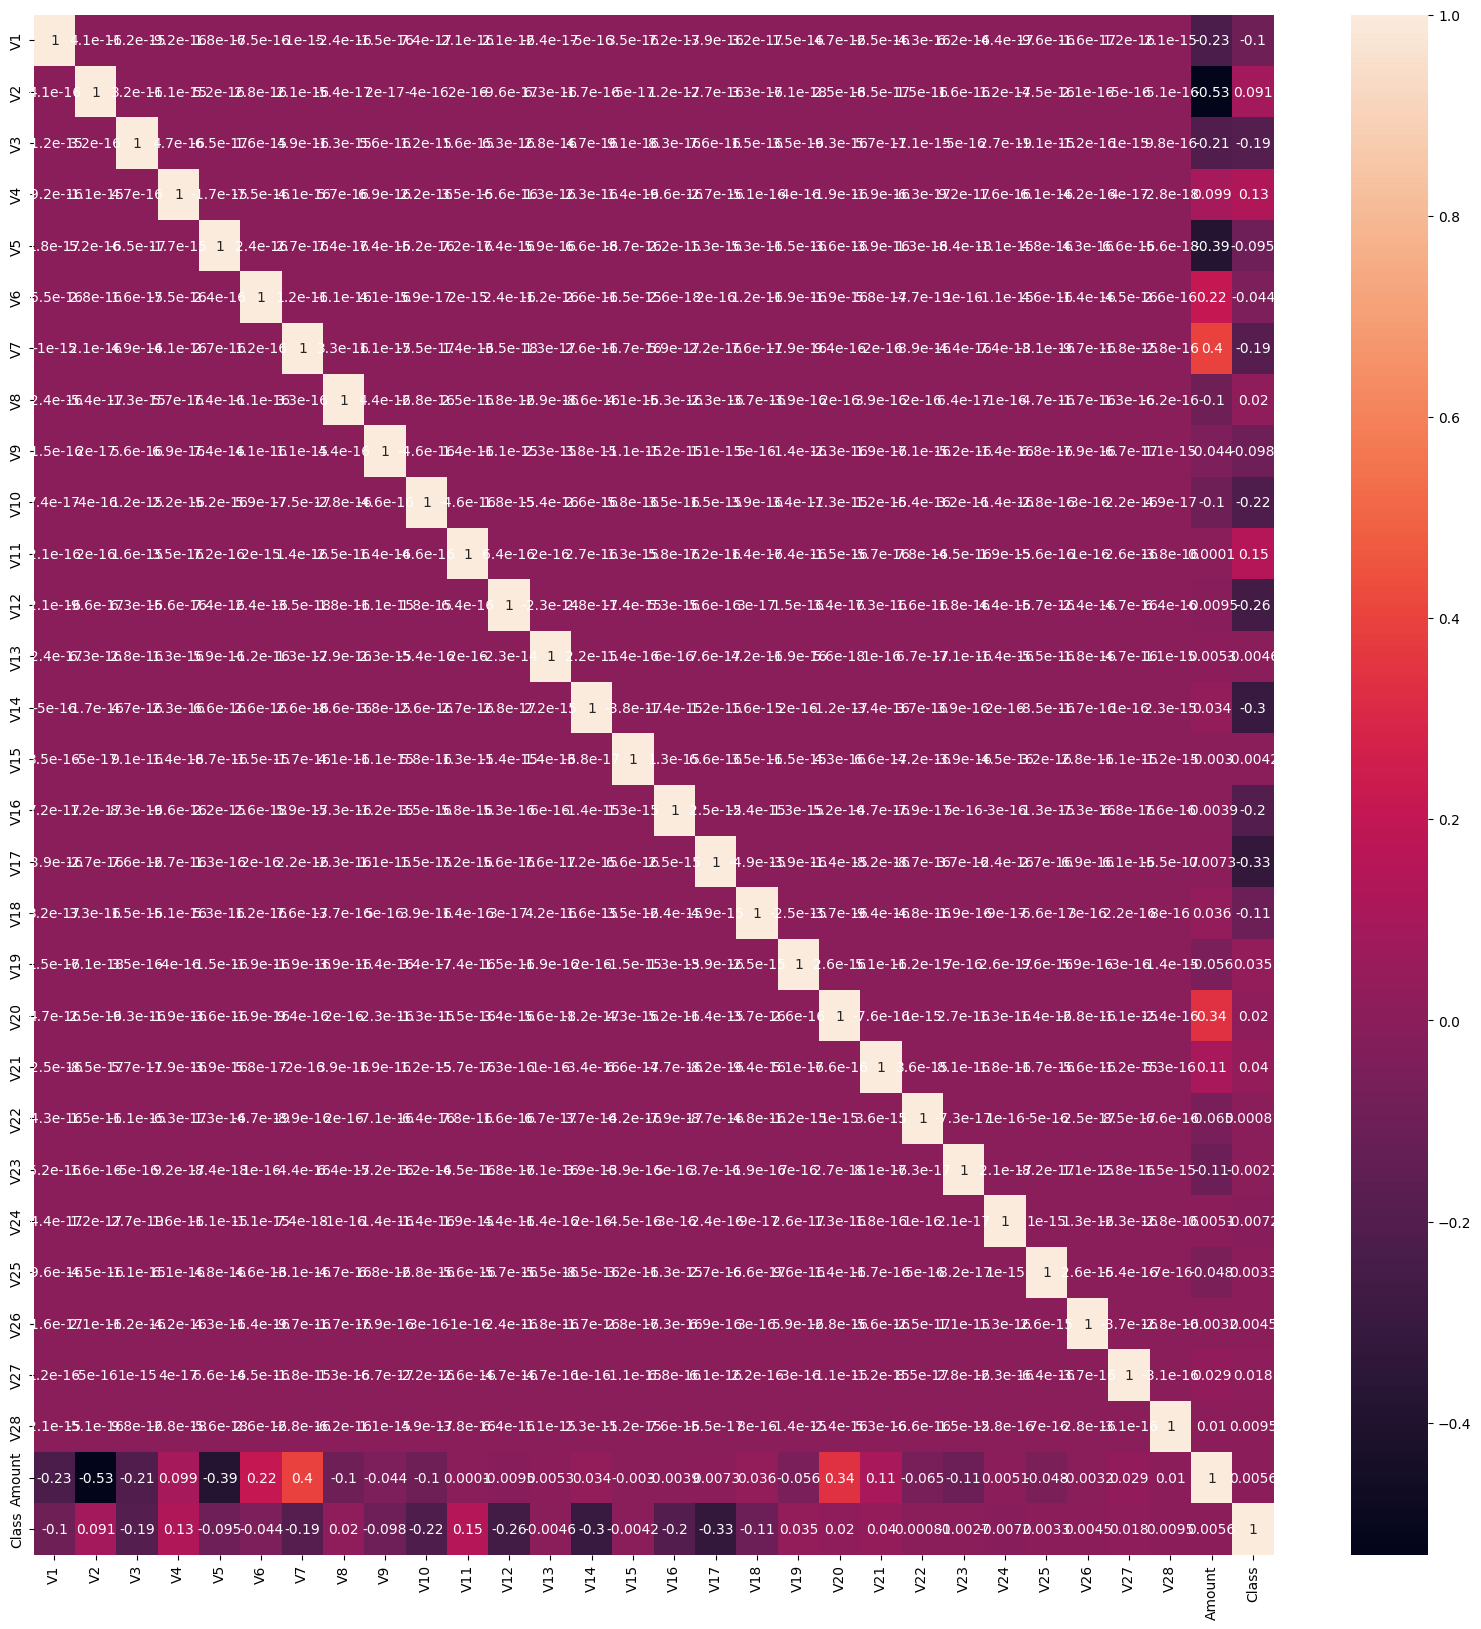

In [84]:
#corelation
corr_matrix=df.corr()
top_corr_features=corr_matrix.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_corr_features].corr(),annot=True)
plt.show()

In [63]:
# finding the number of fraud transactions and true transaction
df_fraud=df[df.Class==1]
df_true=df[df.Class==0]
df_true=df_true.sample(frac=0.5)   # considering the 50% true dataset
data=pd.concat([df_true,df_fraud])  #number of fraud,true 
data=data.reset_index(drop=True)
data.shape

(142650, 30)

In [64]:
data['Amount'].describe()  #describing all the parameters

count    142650.000000
mean         88.022655
std         246.667591
min           0.000000
25%           5.502500
50%          21.900000
75%          76.672500
max       25691.160000
Name: Amount, dtype: float64

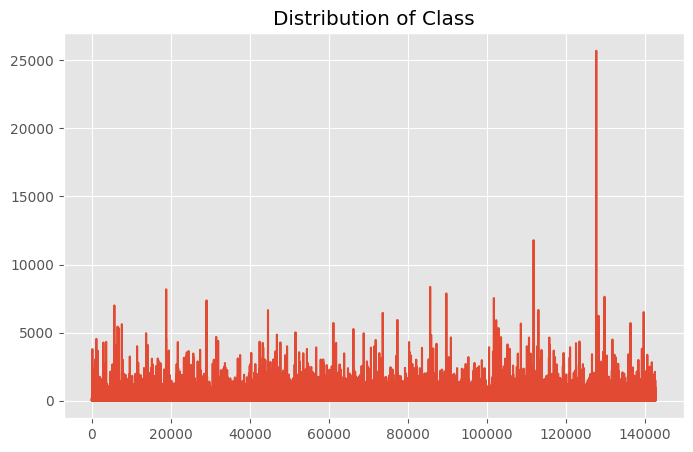

In [65]:
# for this we plot data 
with plt.style.context(('ggplot')):   #it is a style sheet where we plot the graph
    plt.figure(figsize=(8,5))
    plt.title("Distribution of Class")
    plt.plot(data["Amount"])
    plt.show()


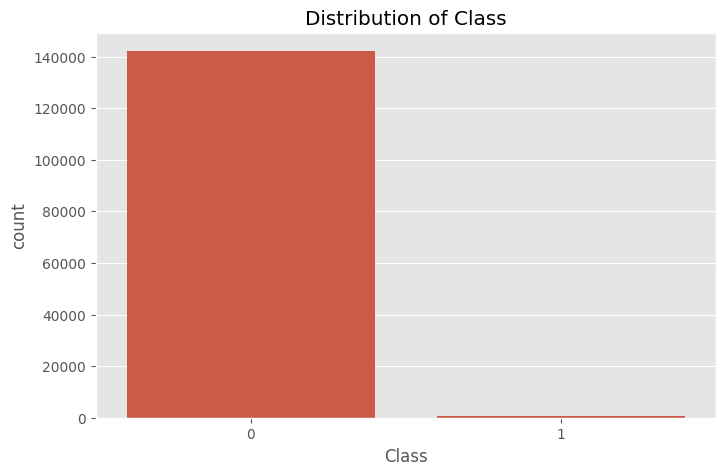

In [66]:
with plt.style.context(('ggplot')):
    plt.figure(figsize=(8,5))
    plt.title("Distribution of Class")
    sns.countplot(data=data,x=data["Class"])
    plt.show()

#### percentage of fraud transactions

In [67]:
fraud_per=round((len(df[df.Class==1])/len(df[df.Class==0]))*100,2)
print(f"The persentage of fraud transactions is {fraud_per} %")

The persentage of fraud transactions is 0.17 %


#### scaling the Amount column with standard scaling process

### Preprocessing of data

In [68]:
sc=StandardScaler()     # it is a preprocessing step to standardize the range of input dataset
data.Amount=sc.fit_transform(data.Amount.values.reshape(-1,1))   # there is variability present in Amount dataset

#### Amount column after transformation

In [69]:
data.Amount

0        -0.026038
1         0.035989
2        -0.352794
3        -0.187430
4        -0.352794
            ...   
142645    1.224232
142646   -0.353767
142647   -0.041078
142648    0.636394
142649   -0.184430
Name: Amount, Length: 142650, dtype: float64

#### Droping the duplicate columns

In [70]:
data.drop_duplicates(inplace=True)

#### Train-Test Split

In [71]:
x=data.drop(["Class"],axis=1)  # droping Class dataset from x
y=data["Class"]                # and assign it to y 
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)  # here we use 80% of data as training data and rest for testing data

### Logistic Regression

In [72]:

model_log=LogisticRegression()
model_log.fit(x_train,y_train)
y_pred_log=model_log.predict(x_test)
print(f"The accuracy of the model is {round(model_log.score(x_test,y_test)*100,2)} %")

The accuracy of the model is 99.85 %


### F1 Score-LogisticRegression

In [73]:
print(f"F1 Score of the model is {round(f1_score(y_test,y_pred_log),2)}")

F1 Score of the model is 0.77


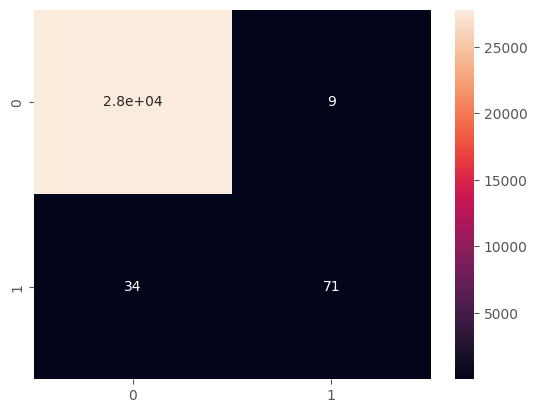

In [74]:
with plt.style.context(('ggplot')):
    sns.heatmap(confusion_matrix(y_test,y_pred_log),annot=True)
    plt.show()

### Random Forest Classifier

In [75]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred_random=model.predict(x_test)

In [76]:
print(f"The accuracy of the model is { round(model.score(x_test,y_test)*100,2)} %")

The accuracy of the model is 99.9 %


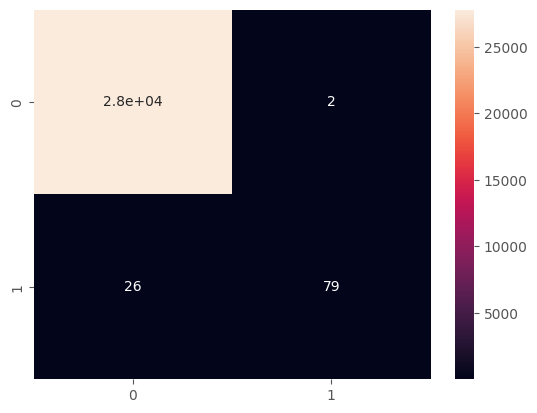

In [77]:
with plt.style.context(('ggplot')):
    sns.heatmap(confusion_matrix(y_test,y_pred_random),annot=True)  # it is more accurate than logistic regression
    plt.show()

In [78]:
print(f"F1 score of the model is {round(f1_score(y_test,y_pred_random),2)}")

F1 score of the model is 0.85


## Using Genetic Algorithm with LogisticRegression

In [79]:
estimator_log=LogisticRegression()
model_ga_log=GeneticSelectionCV(estimator=estimator_log,cv=5,scoring='accuracy',max_features=5,n_population=60,n_gen_no_change=6)
model_ga_log.fit(x_train,y_train)
y_log_ga=model_ga_log.predict(x_test)

c:\Users\preet\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GeneticSelectionCV was fitted without feature names
  warnings.warn(


In [80]:
print(f"The accuracy of the model is {round(model_ga_log.score(x_test,y_test)*100,2)} %")

The accuracy of the model is 99.84 %


c:\Users\preet\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GeneticSelectionCV was fitted without feature names
  warnings.warn(


#### F-1 Score(GA + LgisticRegression)

In [81]:
print(f"F1 Score of the model is{round(f1_score(y_test,y_log_ga),2)}")

F1 Score of the model is0.76


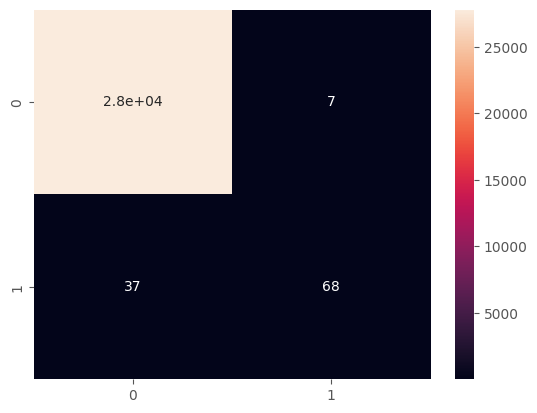

In [82]:
with plt.style.context(('ggplot')):
    sns.heatmap(confusion_matrix(y_test,y_log_ga),annot=True)
    plt.show()